In [1]:
import os
import csv
import sys
import random
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.metrics import roc_auc_score

pd.options.mode.chained_assignment = None  # default='warn'

%matplotlib inline

In [2]:
ll ../results/epoch*

-rw-r--r--@ 1 npt2105  staff    82 Apr 25 16:49 ../results/epoch-results-CB0_0-BW-125_222_24_0_1e-06_256_32.csv
-rw-r--r--@ 1 npt2105  staff  1169 Apr 25 16:49 ../results/epoch-results-CB0_0-BW-125_222_24_10_1e-06_256_32.csv
-rw-r--r--@ 1 npt2105  staff    82 Apr 25 16:49 ../results/epoch-results-CB1_0-BW-125_222_24_0_1e-06_256_32.csv
-rw-r--r--@ 1 npt2105  staff  1171 Apr 25 16:49 ../results/epoch-results-CB1_0-BW-125_222_24_10_1e-06_256_32.csv
-rw-r--r--@ 1 npt2105  staff  2813 Apr 25 16:49 ../results/epoch-results-CB_0-AR-125_222_24_25_1e-06_256_32.csv
-rw-r--r--@ 1 npt2105  staff  2841 Apr 25 16:49 ../results/epoch-results-CB_0-AR-15_222_24_25_1e-06_32_512.csv
-rw-r--r--@ 1 npt2105  staff  2778 Apr 25 16:49 ../results/epoch-results-CB_0-AR-250_222_24_25_1e-06_512_16.csv
-rw-r--r--@ 1 npt2105  staff  1182 Apr 25 16:49 ../results/epoch-results-CB_0-AR-30_222_24_10_1e-06_32_512.csv
-rw-r--r--@ 1 npt2105  staff  2843 Apr 25 16:49 ../results/epoch-results-CB_0-AR-30_222_24_25_1e-06_32_5

In [6]:
# results_file = '../results/epoch-results-CB_0-AR-125_222_24_25_1e-06_256_32.csv'
# results_file = '../results/epoch-results-CB_0-AR-60_222_24_25_1e-06_128_128.csv'
# results_file = '../results/epoch-results-PMB_0-AR-60_222_24_20_1e-06_128_128.csv'
results_file = '../results/epoch-results-CB_6-AR-30_222_24_25_1e-06_32_512.csv'
df = pd.read_csv(results_file)
df

,epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,epoch_time,epoch_saved
0,1,0.001058,0.834671,0.000916,0.845151,247.675407,True
1,2,0.000708,0.865451,0.000638,0.849213,247.577343,True
2,3,0.000451,0.883726,0.000432,0.890337,247.090662,True
3,4,0.000326,0.920753,0.000347,0.923591,247.340046,True
4,5,0.000271,0.941427,0.000313,0.934845,247.007042,True
5,6,0.000238,0.951091,0.000288,0.942207,247.133088,True
6,7,0.000216,0.955890,0.000267,0.944830,247.232972,True
7,8,0.000201,0.959658,0.000252,0.948468,247.103373,True
8,9,0.000190,0.962317,0.000248,0.950668,247.071386,True
9,10,0.000179,0.963901,0.000240,0.951938,247.103160,True


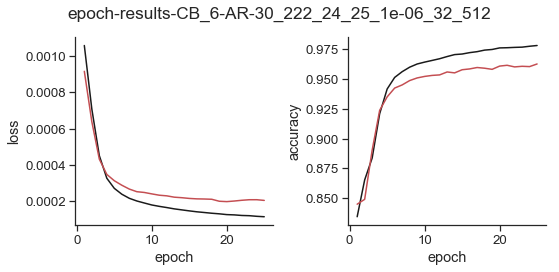

In [7]:
sns.set(style='ticks', font_scale=1.2)
plt.figure(figsize=(8,4))

suptitle = os.path.split(results_file)[-1].split('.')[0]

plt.suptitle(suptitle)

for i, key in enumerate(['loss', 'accuracy']):
    
    plt.subplot(1,2,i+1)
    
    plt.plot(df['epoch'], df[f'train_{key}'], 'k-')
    plt.plot(df['epoch'], df[f'valid_{key}'], 'r-')
    
    plt.xlabel('epoch')
    plt.ylabel(key)
    sns.despine()

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig(f'../figures/training_performance_{suptitle}.pdf')

In [8]:
np.argmin(df['valid_loss'])

19